# Model Building

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df = pd.read_csv('/Users/anthonymoubarak/Desktop/Ken Jee Project /cleaned_glassdoor_data_2.csv')
 

In [2]:
#Choose relevant columns

relevant_columns =  ['Job Title' , 'Average_salary' , 'Rating' , 'Location' , 'Size', 'Same Location',
                    'Industry' ,'Type of ownership','Sector', 'Revenue','Python', 'Spark', 'Excel' , 'Job Description Length']



df_model = df[relevant_columns]

#Get dummy columns for the categorical columns of the dataframe 


categorical_columns = ['Job Title' , 'Location' , 'Size' , 'Industry' , 'Type of ownership' , 'Sector' , 'Revenue']


df_model_with_dummies = pd.get_dummies(df_model , columns = categorical_columns)
df_model_with_dummies.head()

,Average_salary,Rating,Same Location,Python,Spark,Excel,Job Description Length,Job Title_Ag Data Scientist,Job Title_Analytics - Business Assurance Data Analyst,Job Title_Analytics Consultant,...,Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable
0,72.0,3.8,0,1,0,1,2536,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,87.5,3.4,1,1,0,0,4783,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,85.0,4.8,1,1,1,1,3461,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,76.5,3.8,1,1,0,0,3883,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,114.5,2.9,1,1,0,1,2728,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Seperate our df into training and testing sets after defining our X and y

from sklearn.model_selection import train_test_split

X = df_model_with_dummies.drop('Average_salary' , axis = 1)
y = df_model_with_dummies['Average_salary']


X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.2 , random_state = 42)
 

# Model 1: Linear Regression (multivariate)

In [4]:
# Using stats model
import statsmodels.api as sm


X_sm = X = sm.add_constant(X)
model = sm.OLS(y , X_sm)
model.fit().summary()

/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Average_salary   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     17.79
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          3.38e-129
Time:                        21:17:19   Log-Likelihood:                -2614.8
No. Observations:                 725   AIC:                             5948.
Df Residuals:                     366   BIC:                             7594.
Df Model:                         358                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================================================
                                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                           45.3376      6.414      7.068      0.000      32.724      57.951
Rating                                                                                                           3.7302      2.233      1.671      0.096      -0.661       8.121
Same Location                                                                                                    7.5936      3.043      2.496      0.013       1.610      13.577
Python                                                                                                          -2.2240      3.056     -0.728      0.467      -8.233       3.785
Spark                                                                                                            0.5925      2.550      0.232      0.816      -4.422       5.607
Excel                                                                                                           -8.2543      2.214     -3.729      0.000     -12.608      -3.901
Job Description Length                                                                                       -6.526e-05      0.001     -0.082      0.935      -0.002       0.002
Job Title_Ag Data Scientist                                                                                     -0.1012      6.064     -0.017      0.987     -12.027      11.824
Job Title_Analytics - Business Assurance Data Analyst                                                          -39.9120     11.698     -3.412      0.001     -62.916     -16.908
Job Title_Analytics Consultant                                                                                 -13.6459     17.200     -0.793      0.428     -47.468      20.176
Job Title_Analytics Manager                                                                                      4.7334     17.492      0.271      0.787     -29.664      39.131
Job Title_Analytics Manager - Data Mart                                                                        -48.2840     11.694     -4.129      0.000     -71.279     -25.289
Job Title_Assistant Director/Director, Office of Data Science                                                  -41.8373     13.975     -2.994      0.003     -69.318     -14.356
Job Title_Associate Data Analyst                                                                               -67.2714     13.109     -5.132      0.000     -93.051     -41.492
Job Title_Associate Data Analyst- Graduate Development Program            

In [5]:
# Using sklearn 

from sklearn.linear_model import LinearRegression , Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

error_linear = round(np.mean(cross_val_score(lm , X_train , y_train, scoring = 'neg_mean_absolute_error')) , 2)

print("This model's error is about " , (error_linear) )

This model's error is about  -22.87


/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# Model 2: Lasso Regression

In [6]:

errors = []
alphas = []
for i in np.arange(0 , 1 , 0.01):
    lm_lasso = Lasso(alpha = i)
    error = (round(np.mean(cross_val_score(lm_lasso , X_train , y_train, scoring = 'neg_mean_absolute_error')) , 2))
    errors.append(error)
    alphas.append(i)
    
error_lasso = min_error = max(errors)
alpha_min_error = alphas[errors.index(max(errors))]



/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in vers

/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in vers

/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in vers

The minimum error is  -18.38  with a corresponding alpha value of  0.02


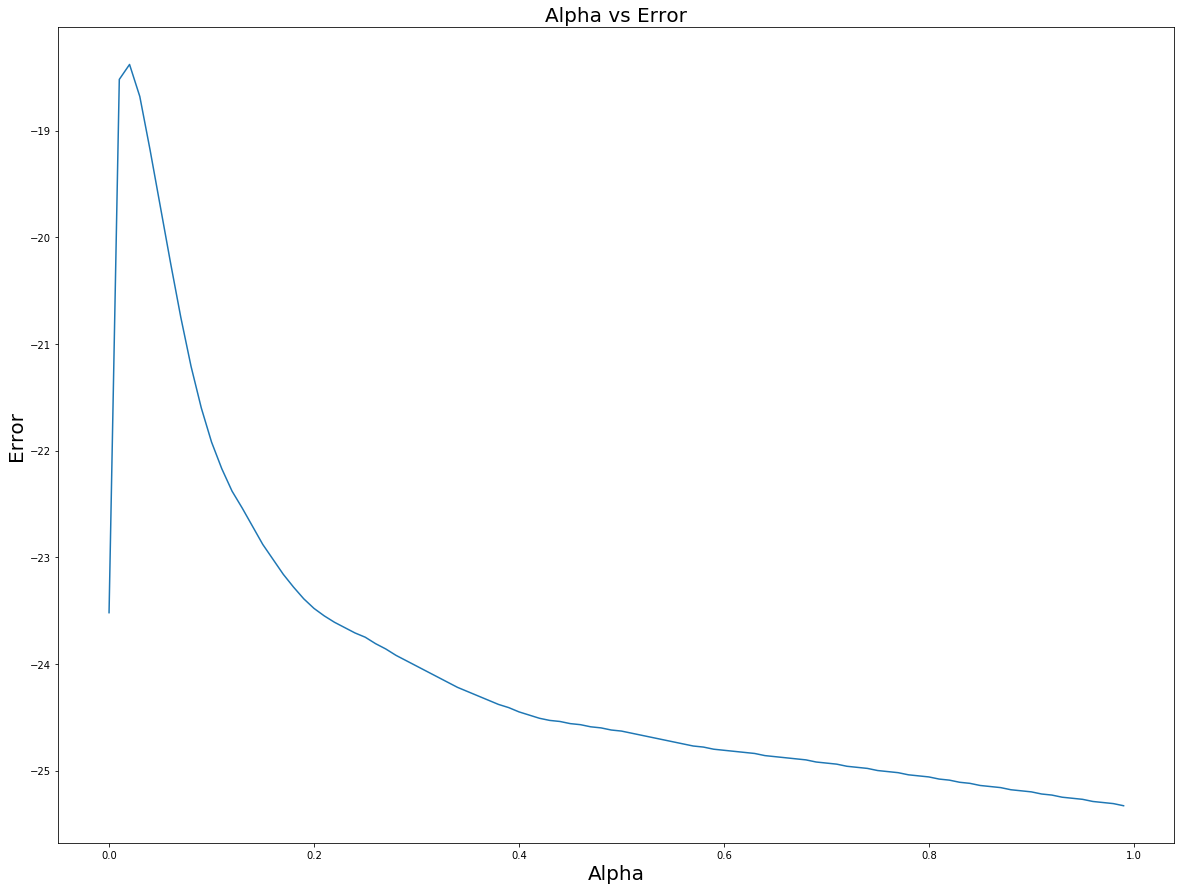

In [7]:
fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.plot(alphas , errors)
plt.xlabel('Alpha' , size = 20)
plt.ylabel('Error' , size = 20)
plt.title('Alpha vs Error' , size = 20)
print('The minimum error is ' , min_error, ' with a corresponding alpha value of ' , alpha_min_error)

# Model 3: Random Forest 

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
error_rf = (round(np.mean(cross_val_score(rf , X_train , y_train, scoring = 'neg_mean_absolute_error')) , 2))

error_rf

/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20

-19.44

In [9]:
# Model tuning using grid search
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10,100,10) , 'criterion' :('mse' , 'mae') , 'max_features':('auto' ,'sqrt' , 'log2')}

gs = GridSearchCV(rf , parameters, scoring = 'neg_mean_absolute_error' , cv=3 )


gs.fit(X_train , y_train)

/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mse', 'mae'),
  

In [10]:
gs.best_score_

-17.577159961685823

In [11]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# Test all models

In [12]:
# Use model tunings to recreate optimal lm_lasso and rf
lm_lasso_optimal = Lasso(alpha = 0.02)
lm_lasso_optimal.fit(X_train , y_train)
rf_optimal = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=90,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

rf_optimal.fit(X_train , y_train)


tpred_lm = lm.predict(X_test)
tpred_lasso = lm_lasso_optimal.predict(X_test)
tpred_rf = rf_optimal.predict(X_test)

In [13]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test , tpred_lm ), mean_absolute_error(y_test , tpred_lasso ), mean_absolute_error(y_test , tpred_rf )

(1971585777.132131, 15.256654595556066, 15.375747126436783)

In [14]:
# Combine results of our 2 best models 

tpred_total = (tpred_lasso + tpred_rf)/2
mean_absolute_error(y_test , tpred_total)

14.471105066468283

# Testing Model Combination Proportions

In [15]:
lasso_coefficients = []
rf_coefficients = []
total_prediction_errors = []

for i in np.arange(0.1,1,0.1):
    j = 1 - i
    lasso_coefficients.append(i)
    rf_coefficients.append(j)
    total_prediction = i*tpred_lasso + j*tpred_rf
    total_prediction_error = mean_absolute_error(y_test , total_prediction)
    total_prediction_errors.append(total_prediction_error)
    
    
minimum_error = min(total_prediction_errors)
optimal_lasso_coefficient = lasso_coefficients[total_prediction_errors.index(minimum_error)]
optimal_rf_coefficient = 1 - optimal_lasso_coefficient

In [16]:
print('Lasso coefficient: ' , optimal_lasso_coefficient )
print('Random Forest coefficient: ' , optimal_rf_coefficient )
print('Final error: ' , minimum_error )

Lasso coefficient:  0.5
Random Forest coefficient:  0.5
Final error:  14.471105066468283


In [17]:
# Optimal model

Optimal_model = optimal_lasso_coefficient*tpred_lasso + optimal_rf_coefficient*tpred_rf